# Pandas I: Introduction

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

## Problem 1:

In [7]:
even = np.arange(26)*2
ser = pd.Series(np.array([n**2 -1 for n in even]), index=even)
ser[ser.index %3 == 0] = 0

In [8]:
ser

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64

## Problem 2:

In [34]:
def random_walk(p, d=100):
    d_index = pd.date_range("1/1/2000", "12/31/2000", freq='D')
    R = bernoulli.rvs(p, size=366)
    R[R==0] = -1
    draws = pd.Series(R, index=d_index)
    draws[0] = d
    draws_cumul = draws.cumsum()
    draws_cumul[draws_cumul < 0] == 0
    draws_cumul.plot()
    return


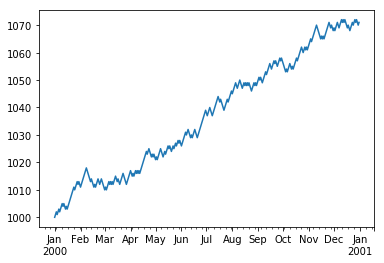

In [39]:
random_walk(.59, d = 1000)

## Problem 3:

In [65]:
#build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major })
studentInfo

,ID,Name,Sex,Age,Class
0,0,Mylan,M,20,Sp
1,1,Regan,F,21,Se
2,2,Justin,M,18,Fr
3,3,Jess,F,22,Se
4,4,Jason,M,19,Sp
5,5,Remi,F,20,J
6,6,Matt,M,20,J
7,7,Alexander,M,19,J
8,8,JeanMarie,F,20,Se


In [62]:
studentInfo[(studentInfo['Age']>19) & (studentInfo['Sex']=='M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


## Problem 4:

In [63]:
df = pd.merge(studentInfo[studentInfo['Sex']=='M'], otherInfo)[['ID', 'Age', 'GPA']]

In [64]:
df

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


# Pandas 2: Plotting

In [71]:
from pydataset import data

initiated datasets repo at: /Users/abslaptop/.pydataset/


In [72]:
Arbuthnot = data("Arbuthnot")

In [73]:
Arbuthnot.head()

,Year,Males,Females,Plague,Mortality,Ratio,Total
1,1629,5218,4683,0,8771,1.114243,9.901
2,1630,4858,4457,1317,10554,1.089971,9.315
3,1631,4422,4102,274,8562,1.078011,8.524
4,1632,4994,4590,8,9535,1.088017,9.584
5,1633,5158,4839,0,8393,1.065923,9.997


Text(0.5,1,'Males and Females birth aggregates')

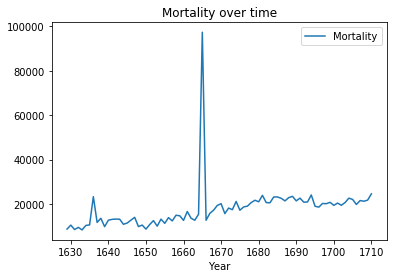

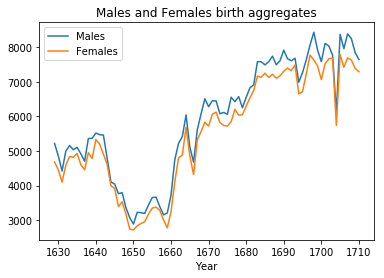

In [91]:
Arbuthnot.plot(x='Year', y=["Mortality"])
plt.title("Mortality over time")
Arbuthnot.plot(x='Year', y=['Males','Females'])
plt.title("Males and Females birth aggregates")



Note that we can see a large spike in mortality in 1665, implying that there was a serious plague around that time, confirmed by the data. Moreover, we see that the pattern of Male and Female births are relatively identical, as to be expected.

In [97]:
death = data("road")
death.head()

,deaths,drivers,popden,rural,temp,fuel
Alabama,968,158,64.0,66.0,62,119.0
Alaska,43,11,0.4,5.9,30,6.2
Arizona,588,91,12.0,33.0,64,65.0
Arkanas,640,92,34.0,73.0,51,74.0
Calif,4743,952,100.0,118.0,65,105.0


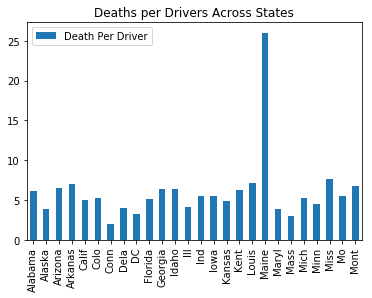

In [100]:
death['Death Per Driver'] = death['deaths']/death['drivers']
death.plot(kind="bar", y=['Death Per Driver'], title = 'Deaths per Drivers Across States')


Text(0.5,1,'Temperature Versus Relative Death')

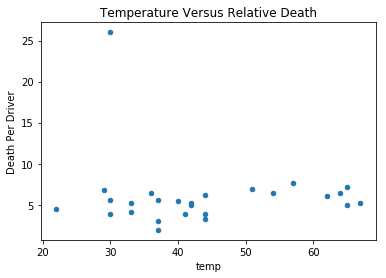

In [103]:
death.plot(kind='scatter', x='temp', y='Death Per Driver')
plt.title("Temperature Versus Relative Death")

We see that deaths per driver, an important metric, is relatively consistent across the United States except for Maine, where it is 5 times greater than the average. This warrants more investigation. Moreover, we see that temperature is not a factor in assessing relative death in the second graph.

# Pandas 3:

## Problem 1:

In [187]:
iris = data('iris')
poisons = data('poisons')
diamonds = data('diamonds')

In [188]:
species = iris.groupby("Species")

species.get_group("setosa").sample(5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
23,4.6,3.6,1.0,0.2,setosa
12,4.8,3.4,1.6,0.2,setosa
29,5.2,3.4,1.4,0.2,setosa
36,5.0,3.2,1.2,0.2,setosa
37,5.5,3.5,1.3,0.2,setosa


In [189]:
species.mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


It seems like the setosa is the easies to distinguish out of the group, from the fact that the setosa petal width is much smaller as is the petal length when compared ot the other two types of flowers.


Given iris data sans label, we could compare some of its characteristics, i.e. sepal length, width, petal length/width to the averages of the three types of irises, which should let us identify it with some degree of accuracy.

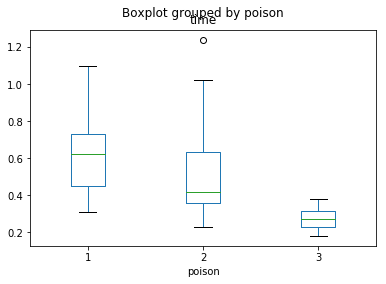

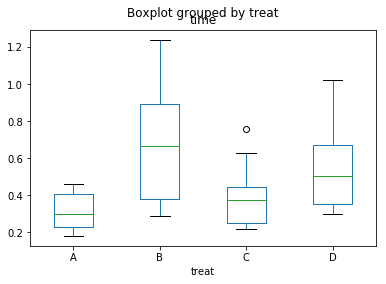

In [197]:
potions = poisons.groupby(['poison', 'treat'])

poisons.boxplot('time', by='poison', grid=False)
poisons.boxplot('time', by='treat', grid=False)

## <font color=blue> We observe that in general, poison 1 is the 'deadliest', and treatment B has the longest survival time, making it the most 'effective'. But in a much deeper sense, what is effectiveness if all of the animals eventually die? There is no cure, just prolonged suffering and pain. In that sense, it seems that treatment B is utterly cruel, keeping animals on their last thread of life for hours on end as the poison slowly, but surely eats away at their insides. </font>



Text(0.5,1,'Mean Survival Time Across Poisons and Treatments')

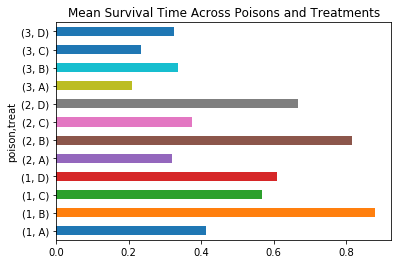

In [207]:
potions["time"].mean().plot(kind='barh')
plt.title("Mean Survival Time Across Poisons and Treatments")

We see that B is still the most effective treatment for all of the poisons here, even though it's close between B and D for poison 3.

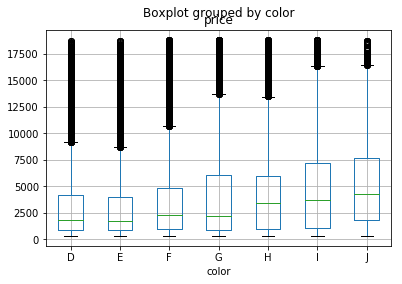

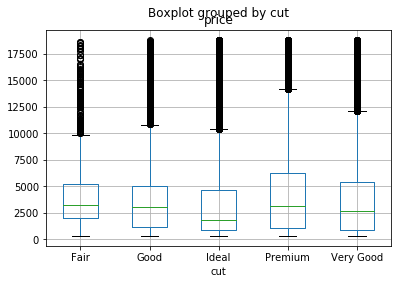

In [236]:
diamonds.head()

cut = diamonds.groupby('cut')
diamonds.boxplot('price', by='color')
diamonds.boxplot('price', by='cut')

We see that in the average case, the cut seems not to affect the price of the diamond, whereas some colors sell for much more on average than others (note J, I and H). 

Text(0.5,1,'Distribution of H + Fair')

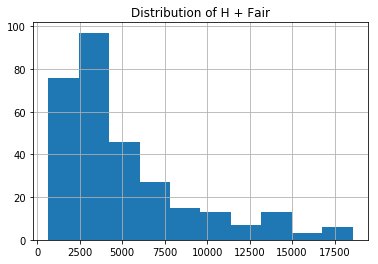

In [247]:
colorcut = diamonds.groupby(["color","cut"])
colorcut.get_group(('H', 'Fair'))['price'].hist()
plt.title("Distribution of Prices: H + Fair")

Text(0.5,1,'Distribution of H + Ideal')

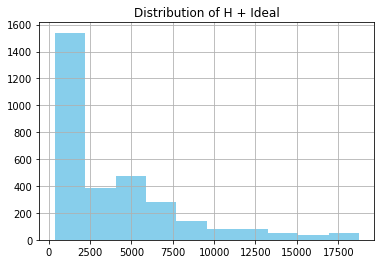

In [255]:
colorcut.get_group(('H', 'Ideal'))['price'].hist(color='skyblue')
plt.title("Distribution of Prices: H + Ideal")

We see that these distributions are very skewed. Further investigation reveals:

Mean of H+Fair Size: 1.2191749174917463
Mean of H+Ideal Size: 0.7995248796147678


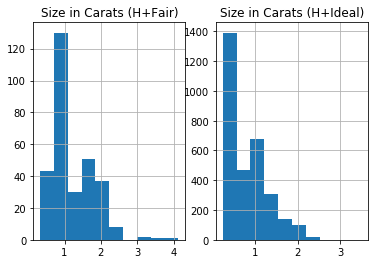

In [261]:
plt.subplot(1,2,1)
colorcut.get_group(('H', 'Fair'))['carat'].hist()
meanfair = colorcut.get_group(('H', 'Fair'))['carat'].mean()
plt.title("Size in Carats (H+Fair)")
plt.subplot(1,2,2)
plt.title("Size in Carats (H+Ideal)")
colorcut.get_group(('H', 'Ideal'))['carat'].hist()
meanideal = colorcut.get_group(('H', 'Ideal'))['carat'].mean()
print("Mean of H+Fair Size: {}\nMean of H+Ideal Size: {}".format(meanfair, meanideal))

We note that the average size of the fair cut diamond is a lot bigger than that of the ideal size, so naturally it would be higher priced. Size matters.

## Problem 2:

In [265]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [274]:
embarked = titanic.pivot_table(values="Survived", index = "Embarked")
print(embarked)

          Survived
Embarked          
C         0.555556
Q         0.357724
S         0.332604


In [270]:
genem = titanic.pivot_table(values="Survived", index = "Embarked", columns="Sex")

In [275]:
print(genem)

Sex         female      male
Embarked                    
C         0.902655  0.305732
Q         0.616667  0.111111
S         0.680412  0.170144


At first glance, it seems that people that embarked from C survived more than people who embarked from Q or S. Conditional on sex, this is still true, but we also observe that far more females survived than men when we control for this.

In [289]:
class_emb = titanic.pivot_table(values="Survived", index = "Embarked", columns="Pclass")
class_emb

Pclass,1.0,2.0,3.0
Embarked,,,
C,0.687943,0.571429,0.366337
Q,0.666667,0.285714,0.353982
S,0.559322,0.417355,0.210101


In [298]:
age = pd.cut(titanic['Age'], [0, 12, 18, 35, 80])
age_emb = titanic.pivot_table(values="Survived", index = "Embarked", columns=age)
age_emb

Age,"(0, 12]","(12, 18]","(18, 35]","(35, 80]"
Embarked,,,,
C,0.666667,0.595238,0.812500,0.604396
Q,0.500000,0.090909,0.000000,0.321429
S,0.333333,0.328889,0.561644,0.342233


When accounting for class, we see that it's actually true that class was a major factor in survival rates. People in class 1 survive much more than people in other classes, although we still observe a slight advantage in embarking from C. 

We see that children were likely to survive, and across all embarking locations, the elderly seemed to survive as well. An interesting note is that the survival rates were actually quite uniform on people who embarked from C.

# Pandas 4: Time Series

In [299]:
from datetime import datetime

## Problem 1:

In [372]:
djia = pd.read_csv('DJIA.csv')
djia.head()

,DATE,VALUE
0,2006-09-27,11689.24
1,2006-09-28,11718.45
2,2006-09-29,11679.07
3,2006-10-02,11670.35
4,2006-10-03,11727.34


,VALUE
DATE,
2006-09-27,11689.24
2006-09-28,11718.45
2006-09-29,11679.07
2006-10-02,11670.35
2006-10-03,11727.34
2006-10-04,11850.61
2006-10-05,11866.69
2006-10-06,11850.21
2006-10-09,11857.81


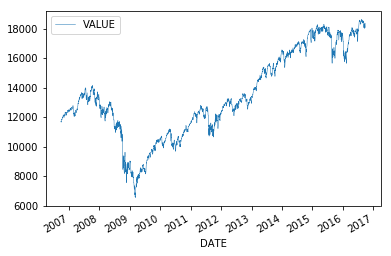

In [373]:
djia.index = pd.to_datetime(djia['DATE'], format="%Y-%m-%d")
djia = djia.drop(columns='DATE')
djia= djia[djia['VALUE'] != '.']
djia['VALUE'] = pd.to_numeric(djia['VALUE'])
djia.head()
djia.plot(y='VALUE', lw=.5)


## Problem 2:

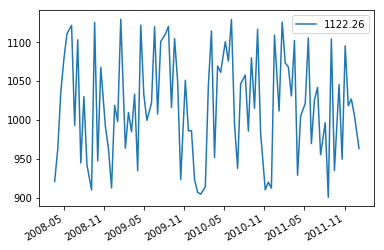

In [374]:
paychecks = pd.read_csv('paychecks.csv')
x1 =pd.date_range(start='3/13/2008', periods=46, freq="WOM-1FRI")
x3 =pd.date_range(start='3/13/2008', periods=46, freq="WOM-3FRI")
date_ind = x1.union(x3)
paychecks.index = date_ind
paychecks.plot()

## Problem 5:

In [395]:
djia['returns'] = djia['VALUE'] - djia['VALUE'].shift(1)

largest_gain = djia['returns'].max()
largest_gain_day = djia['returns'].idxmax()
print("The largest gain was: {} on {}".format(largest_gain, largest_gain_day))

smallest_gain = djia['returns'].min()
smallest_gain_day = djia['returns'].idxmin()
print("The largest loss was: {} on {}".format(smallest_gain, smallest_gain_day))

djia2 = djia.copy()
djia2 = djia2.drop(columns = 'returns')
djia2 = djia2.resample('M').last()
djia2['returns'] = djia2['VALUE'] - djia2['VALUE'].shift(1)
largest_gainM = djia2['returns'].max()
largest_gain_dayM = djia2['returns'].idxmax()
print("The largest monthly gain was: {} on {}".format(largest_gainM, largest_gain_dayM))

smallest_gainM = djia2['returns'].min()
smallest_gain_dayM = djia2['returns'].idxmin()
print("The largest loss was: {} on {}".format(smallest_gainM, smallest_gain_dayM))

The largest gain was: 936.4200000000001 on 2008-10-13 00:00:00
The largest loss was: -777.6799999999985 on 2008-09-29 00:00:00
The largest monthly gain was: 1378.8400000000001 on 2015-10-31 00:00:00
The largest loss was: -1525.6499999999996 on 2008-10-31 00:00:00


## Problem 6:

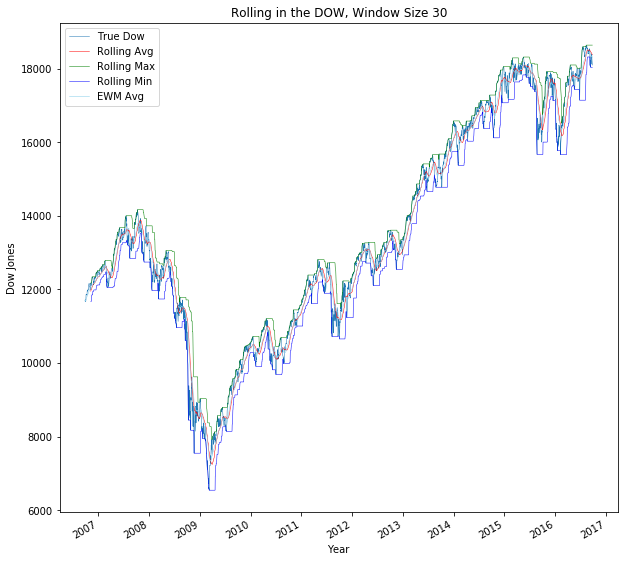

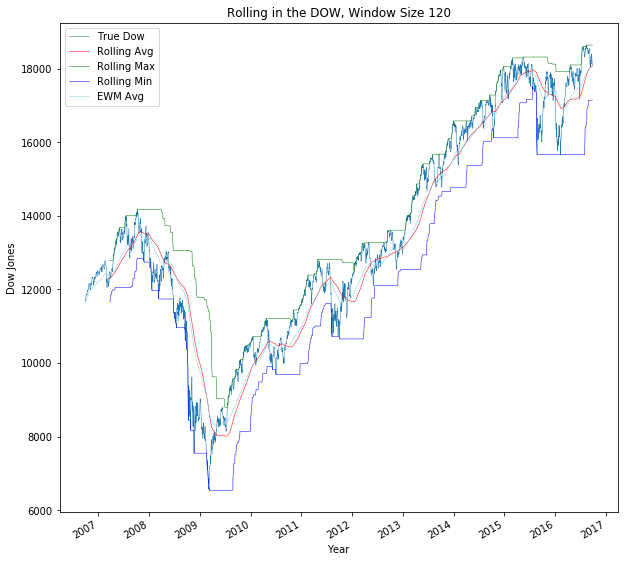

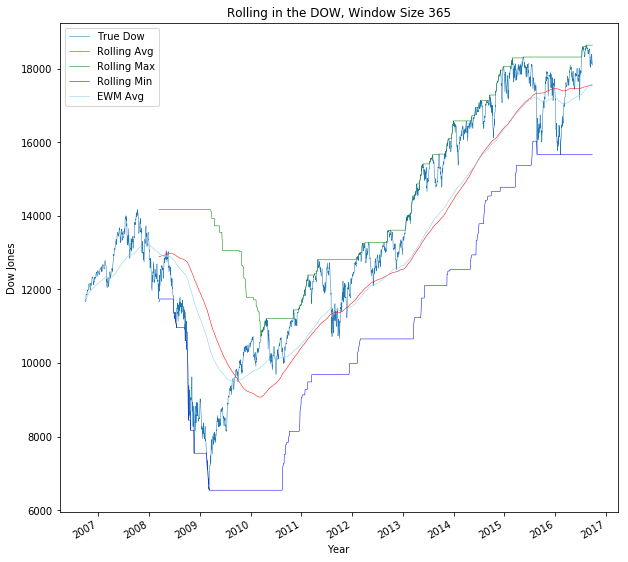

In [421]:
def windosity(win_size):
    figure, ax = plt.subplots(figsize=(10,10))
    ax.plot(djia['VALUE'], lw=.5)
    djia['VALUE'].rolling(window=win_size).mean().plot(color='r', lw=.5, ax=ax)
    djia['VALUE'].rolling(window=win_size).max().plot(color='g', lw=.5, ax=ax)
    djia['VALUE'].rolling(window=win_size).min().plot(color='b', lw=.5, ax=ax)
    djia['VALUE'].ewm(span=win_size).mean().plot(color='skyblue', lw=.5, ax=ax)
    ax.legend(['True Dow', 'Rolling Avg', 'Rolling Max', 'Rolling Min', 'EWM Avg'])
    plt.title('Rolling in the DOW, Window Size {}'.format(win_size))
    plt.xlabel('Year')
    plt.ylabel('Dow Jones')
    plt.show()
    
windosity(30)
windosity(120)
windosity(365)